In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib agg

import jax
import jax.numpy as jnp
import visualization
from utils import results, experiments, settings, equioutput
import os
import global_settings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
rng_key, rng_key_ = jax.random.split(jax.random.PRNGKey(0))

In [2]:
result = results.ResultSample.load_from_file(
    os.path.join(
        global_settings.PATH_PAPER_RESULTS,
        "{}.tar.gz".format(
            # 1, 3
            "6414c528c5f8cc0c9f08578de5fb1dbc" # sinusoidal
            # 1, 16
            #"74bac4f5529d37d7d94430b21e15b4ad" # izmailov
        )
    )
)
experiment = experiments.FactoryExperiment(result.experiment_type, **{"settings": result.settings})()
print(experiment._settings)

SettingsExperimentSample(output_path='/u/halle/wiese/home_at/data/experiments/paper/results', dataset='sinusoidal', dataset_normalization='standardization', hidden_layers=1, hidden_neurons=3, activation='tanh', activation_last_layer='none', num_warmup=1024, statistic='reduced', statistic_p=0.99, samples_per_chain=1, identifiable_modes=3, pool_size=16, seed=0, overwrite_chains=None)


In [3]:
subspace_0 = jnp.load("subspace_0_0_sinusoidal.npy").transpose(1, 0, 2)
subspace_1 = jnp.load("subspace_0_1_sinusoidal.npy").transpose(1, 0, 2)
subspace_2 = jnp.load("subspace_0_2_sinusoidal.npy").transpose(1, 0, 2)

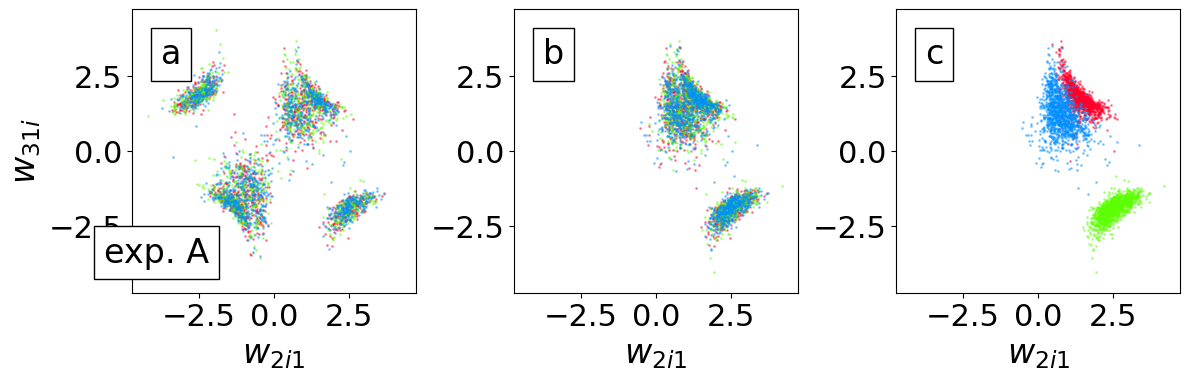

In [4]:
i = 1
j = 2
cmap = matplotlib.cm.get_cmap("gist_rainbow")
scale = jnp.std(subspace_0) * 3.0
textsize = 24
props = dict(boxstyle='square', facecolor='white', alpha=1.0)

figure = plt.figure(figsize=(12, 4), tight_layout=True)

# (a)
ax1 = figure.add_subplot(1, 3, 1)
ax1.set_aspect("equal")
ax1.set_xlim([-scale, scale])
ax1.set_ylim([-scale, scale])
ax1.set_xlabel(r"$w_{2i1}$")
ax1.set_ylabel(r"$w_{31i}$")
ax1.xaxis.label.set_size(textsize)
ax1.yaxis.label.set_size(textsize)
ax1.tick_params(axis='both', which='major', labelsize=textsize - 2)
ax1.text(-0.1, 0.2, "exp. A", transform=ax1.transAxes, fontsize=textsize, verticalalignment='top', bbox=props)
ax1.text(0.1, 0.9, "a", transform=ax1.transAxes, fontsize=textsize, verticalalignment='top', bbox=props)
for k, element in enumerate(subspace_0):
    color = cmap(1.0 * k / len(subspace_0))
    ax1.scatter(element[:, i], element[:, j], s=1, color=color, alpha=0.4, rasterized=True)
    pass

# (b)
ax2 = figure.add_subplot(1, 3, 2)
ax2.set_aspect("equal")
ax2.set_xlim([-scale, scale])
ax2.set_ylim([-scale, scale])
ax2.set_xlabel(r"$w_{2i1}$")
ax2.xaxis.label.set_size(textsize)
#ax2.set_yticklabels([])
#ax2.set_yticks([])
ax2.tick_params(axis='both', which='major', labelsize=textsize - 2)
ax2.text(0.1, 0.9, "b", transform=ax2.transAxes, fontsize=textsize, verticalalignment='top', bbox=props)
for k, element in enumerate(subspace_1):
    color = cmap(1.0 * k / len(subspace_1))
    ax2.scatter(element[:, i], element[:, j], s=1, color=color, alpha=0.4, rasterized=True)
    pass

# (c)
ax3 = figure.add_subplot(1, 3, 3)
ax3.set_aspect("equal")
ax3.set_xlim([-scale, scale])
ax3.set_ylim([-scale, scale])
ax3.set_xlabel(r"$w_{2i1}$")
ax3.xaxis.label.set_size(textsize)
#ax3.set_yticklabels([])
#ax3.set_yticks([])
ax3.tick_params(axis='both', which='major', labelsize=textsize - 2)
ax3.text(0.1, 0.9, "c", transform=ax3.transAxes, fontsize=textsize, verticalalignment='top', bbox=props)
for k, element in enumerate(subspace_2):
    color = cmap(1.0 * k / len(subspace_2))
    ax3.scatter(element[:, i], element[:, j], s=1, color=color, alpha=0.4, rasterized=True)
    pass

figure

In [5]:
figure.savefig(os.path.join(global_settings.PATH_FIGURES, "figure_03_expA_1.pdf"), bbox_inches="tight", dpi=192, transparent=True)

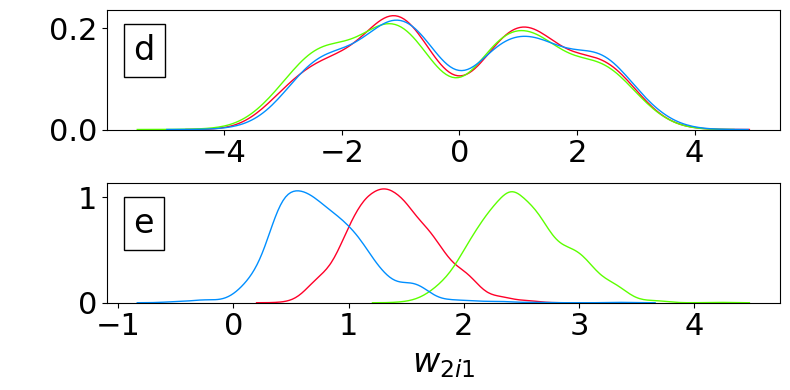

In [6]:
i = 1
j = 2
textsize = 24
props = dict(boxstyle='square', facecolor='white', alpha=1.0)

figure = plt.figure(figsize=(8, 4), tight_layout=True)

# (d)
ax1 = figure.add_subplot(2, 1, 1)
#ax1.set_xlim([-scale, scale])
#ax1.set_ylim([-scale, scale])
#ax1.set_xlabel(r"$w_{2i1}$")
ax1.set_ylabel(" ")
ax1.xaxis.label.set_size(textsize)
ax1.yaxis.label.set_size(textsize)
ax1.tick_params(axis='both', which='major', labelsize=textsize - 2)
ax1.text(0.04, 0.8, "d", transform=ax1.transAxes, fontsize=textsize, verticalalignment='top', bbox=props)

for k, element in enumerate(subspace_0):
    color = cmap(1.0 * k / len(subspace_0))
    sns.kdeplot(x=element[:, i], ax=ax1, fill=False, color=color, alpha=1.0, linewidth=1.0, warn_singular=False, rasterized=False)
    pass

# (e)
# (d)
ax2 = figure.add_subplot(2, 1, 2)
#ax2.set_xlim([-scale, scale])
#ax2.set_ylim([-scale, scale])
ax2.set_xlabel(r"$w_{2i1}$")
ax2.set_ylabel(" ")
ax2.xaxis.label.set_size(textsize)
ax2.yaxis.label.set_size(textsize)
ax2.tick_params(axis='both', which='major', labelsize=textsize - 2)
ax2.text(0.04, 0.8, "e", transform=ax2.transAxes, fontsize=textsize, verticalalignment='top', bbox=props)

for k, element in enumerate(subspace_2):
    color = cmap(1.0 * k / len(subspace_0))
    sns.kdeplot(x=element[:, i], ax=ax2, fill=False, color=color, alpha=1.0, linewidth=1.0, warn_singular=False, rasterized=False)
    pass

figure

In [7]:
figure.savefig(os.path.join(global_settings.PATH_FIGURES, "figure_03_expA_2.pdf"), bbox_inches="tight", dpi=300, transparent=True)